# PROGRAMMING FOR SCIENTIFIC COMPUTING
# INNOVATIVE ASSIGNMENT

# Natural Language Processing
# Sentiment Analysis

by Hetul Mehta (21BCE147)

## Importing the libraries

In [ ]:
#importing basic required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout,Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

## Importing the dataset

In [ ]:
dataset = pd.read_csv('IMDB_Dataset.csv')

## Overviewing the dataset

In [ ]:
dataset.shape

(50000, 2)

In [ ]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

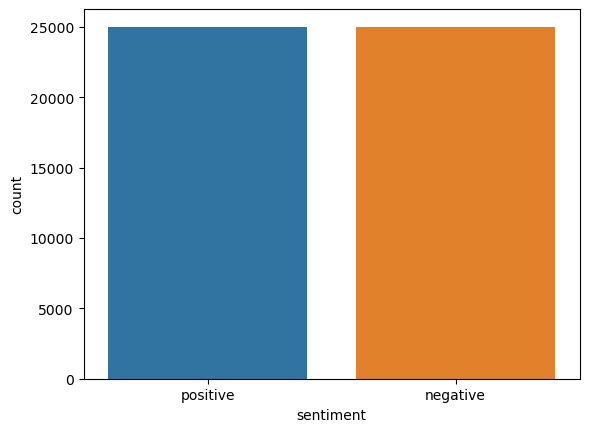

In [ ]:
sns.countplot(x="sentiment",data=dataset)

## Cleaning the texts

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    '''Removes HTML tags: replaces anything between opening and closing <> with empty space'''

    return TAG_RE.sub('', text)
for i in range(0, 50000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])  # Remove punctuations and numbers
  review = review.lower()
  review = remove_tags(review)
  review = review.split()
  ps = PorterStemmer()            # Remove Stopwords
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harshaal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Creating the Bag of Words model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
x=cv.fit_transform(corpus)
y = dataset['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Logistic Regression model


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

C:\Users\harshaal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
y_lr_pred = lr_model.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

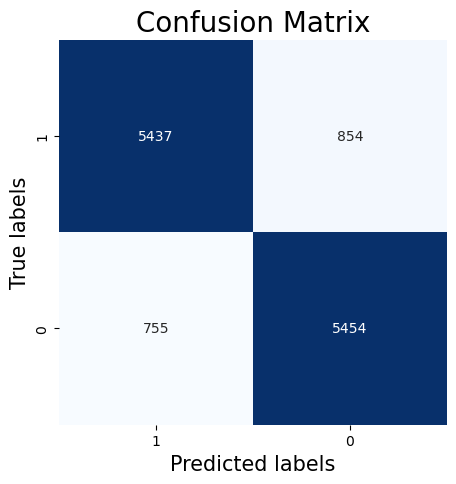


ACCURACY OF LOGISTIC REGRESSION MODEL IS:  87.128 %


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, fmt='g', xticklabels=labels, yticklabels=labels)
    ax.set_xlabel('Predicted labels', fontsize=15)
    ax.set_ylabel('True labels', fontsize=15)
    ax.set_title('Confusion Matrix', fontsize=20)
    plt.show()
label=[1,0]
plot_confusion_matrix(y_test,y_lr_pred,label)
print()
acc_lr=accuracy_score(y_test,y_lr_pred)
print("ACCURACY OF LOGISTIC REGRESSION MODEL IS: ",acc_lr*100,"%")

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
dt_cr=classification_report(y_test, y_lr_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      6291
           1       0.86      0.88      0.87      6209

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500



## Naive Bayes model


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_nb_pred = nb_model.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

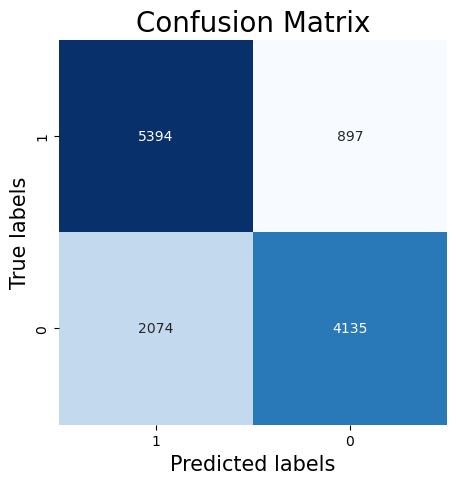


ACCURACY OF NAIVE BAYES MODEL IS:  76.232 %


In [ ]:
plot_confusion_matrix(y_test,y_nb_pred,label)
print()
acc_nb=accuracy_score(y_test,y_nb_pred)
print("ACCURACY OF NAIVE BAYES MODEL IS: ",acc_nb*100,"%")

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
dt_cr=classification_report(y_test, y_nb_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.72      0.86      0.78      6291
           1       0.82      0.67      0.74      6209

    accuracy                           0.76     12500
   macro avg       0.77      0.76      0.76     12500
weighted avg       0.77      0.76      0.76     12500



## KNN model

In [ ]:
'''from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)'''

'from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_knn_pred = knn_model.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

C:\Users\harshaal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


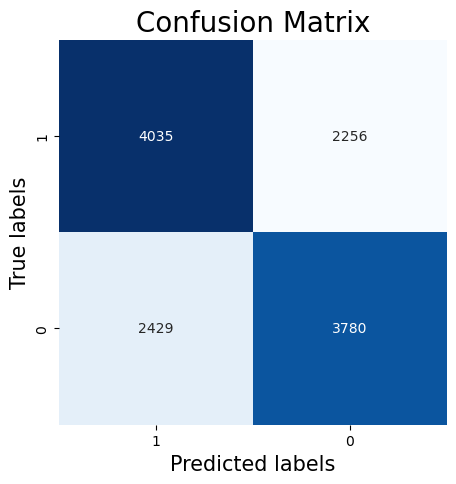


ACCURACY OF KNN MODEL IS:  62.519999999999996 %


In [ ]:
plot_confusion_matrix(y_test,y_knn_pred,label)
print()
acc_knn=accuracy_score(y_test,y_knn_pred)
print("ACCURACY OF KNN MODEL IS: ",acc_knn*100,"%")

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
dt_cr=classification_report(y_test, y_knn_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.62      0.64      0.63      6291
           1       0.63      0.61      0.62      6209

    accuracy                           0.63     12500
   macro avg       0.63      0.63      0.63     12500
weighted avg       0.63      0.63      0.63     12500



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_dt_pred = dt_model.predict(X_test)

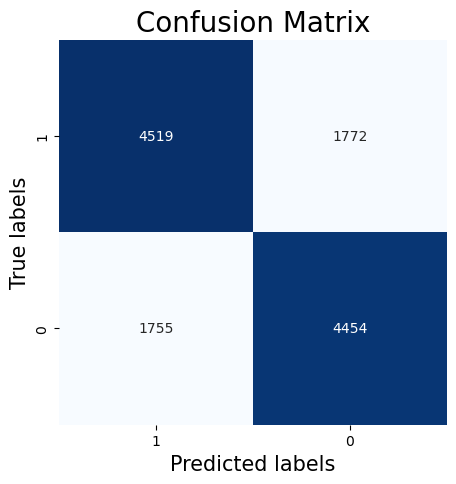


ACCURACY OF NAIVE BAYES MODEL IS:  71.784 %


In [ ]:
plot_confusion_matrix(y_test,y_dt_pred,label)
print()
acc_dt=accuracy_score(y_test,y_dt_pred)
print("ACCURACY OF NAIVE BAYES MODEL IS: ",acc_dt*100,"%")

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
y_rf_pred= rf_model.predict(X_test)
#y_rf_pred

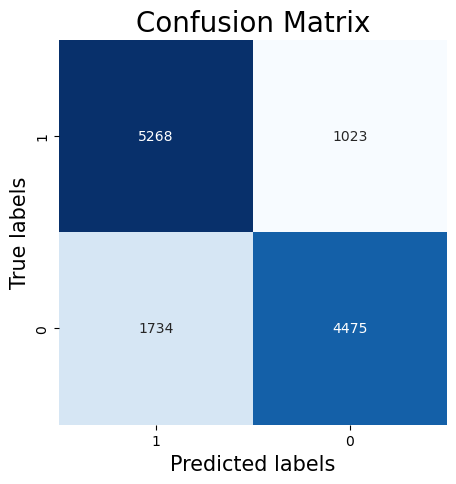


ACCURACY OF KNN MODEL IS:  77.944 %


In [ ]:
plot_confusion_matrix(y_test,y_rf_pred,label)
print()
acc_rf=accuracy_score(y_test,y_rf_pred)
print("ACCURACY OF KNN MODEL IS: ",acc_rf*100,"%")

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
dt_cr=classification_report(y_test, y_rf_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      6291
           1       0.81      0.72      0.76      6209

    accuracy                           0.78     12500
   macro avg       0.78      0.78      0.78     12500
weighted avg       0.78      0.78      0.78     12500



## Multi-layer Perceptron Model

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [ ]:
y_mlp_pred= mlp_model.predict(X_test)
#y_mlp_pred

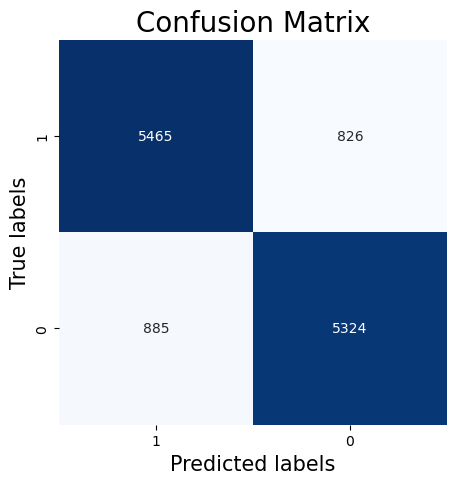


ACCURACY OF MLP MODEL IS:  86.312 %


In [ ]:
plot_confusion_matrix(y_test,y_mlp_pred,label)
print()
acc_mlp=accuracy_score(y_test,y_mlp_pred)
print("ACCURACY OF MLP MODEL IS: ",acc_mlp*100,"%")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
r2_lr = r2_score(y_test, y_lr_pred)
r2_nb = r2_score(y_test, y_nb_pred)
r2_knn = r2_score(y_test, y_knn_pred)
r2_rf = r2_score(y_test,y_rf_pred)
r2_mlp = r2_score(y_test,y_mlp_pred)

In [ ]:
mse_lr = mean_squared_error(y_test, y_lr_pred)
mse_nb = mean_squared_error(y_test, y_nb_pred)
mse_knn = mean_squared_error(y_test, y_knn_pred)
mse_rf = mean_squared_error(y_test,y_rf_pred)
mse_mlp = mean_squared_error(y_test,y_mlp_pred)

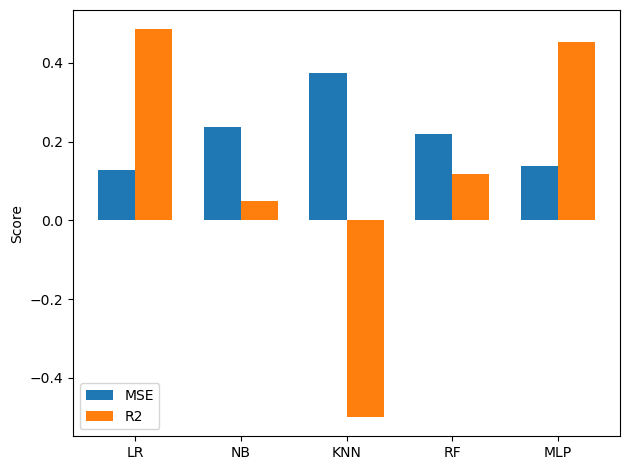

In [ ]:
models = ['LR','NB', 'KNN', 'RF','MLP']
mse_scores = [mse_lr, mse_nb, mse_knn, mse_rf, mse_mlp]
r2_scores = [r2_lr, r2_nb, r2_knn, r2_rf, r2_mlp]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mse_scores, width, label='MSE')
rects2 = ax.bar(x + width/2, r2_scores, width, label='R2')

ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()

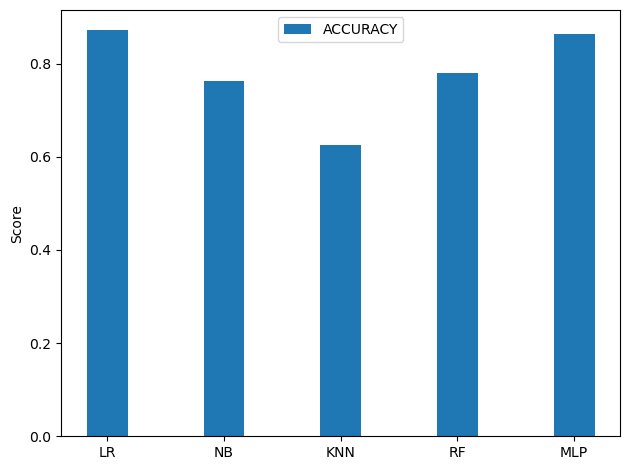

In [ ]:
models = ['LR','NB', 'KNN', 'RF','MLP']
acc=[acc_lr, acc_nb, acc_knn, acc_rf,acc_mlp]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects=ax.bar(x,acc,width,label='ACCURACY')

ax.set_ylabel('Score')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()

DEEP LEARNING MODEL

In [ ]:
# Load the dataset
data = pd.read_csv('IMDB_Dataset.csv')

In [ ]:
# Tokenize the words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])

# Pad the sequences
max_len = 100
X = pad_sequences(sequences, maxlen=max_len)

In [ ]:
# Convert the sentiment labels to binary format
y = pd.get_dummies(data['sentiment']).values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the CNN model
model = Sequential()
model.add(Embedding(5000, 32, input_length=max_len))
model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=4, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.add(Flatten())

In [ ]:
# Compile the model
optimizer = Adam(lr=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\harshaal\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
checkpoint = ModelCheckpoint('model_best_weights.h5', monitor='val_accuracy', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=64, callbacks=[early_stopping, checkpoint])


Epoch 1/20
625/625 [==============================] - 8s 11ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
625/625 [==============================] - 6s 9ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/20
625/625 [==============================] - 6s 9ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/20
625/625 [==============================] - 6s 10ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
625/625 [==============================] - 6s 10ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
625/625 [==============================] - 6s 9ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


Accuracy: 50.00%


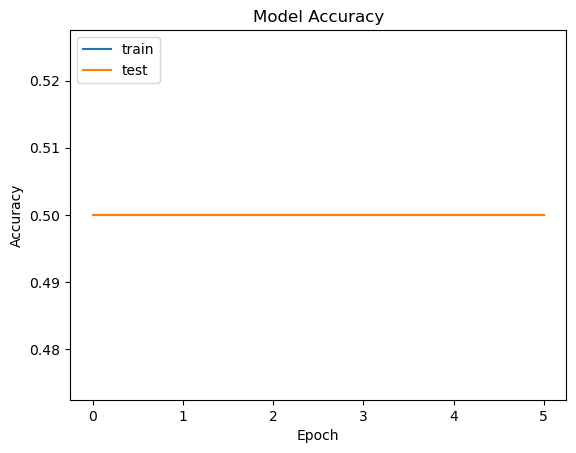

In [ ]:
# Evaluate the model on the testing data
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()